Below is to import tools we need 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
FILE_PATH = "data tools class final data set.csv"  #to read file
df = pd.read_csv(FILE_PATH)

#Looks at file, a peek
df.head()

,"last_name, first_name",player_id,year,player_age,pa,hit,k_percent,bb_percent,batting_avg,slg_percent,...,b_rbi,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,exit_velocity_avg
0,"Cabrera, Miguel",408234,2021,38,526,121,22.4,7.6,0.256,0.386,...,75,0.234,0.420,0.305,0.315,0.301,0.186,0.356,0.372,91.4
1,"Cruz Jr., Nelson",443558,2021,40,584,136,21.6,8.7,0.265,0.497,...,86,0.264,0.512,0.346,0.363,0.341,0.248,0.414,0.439,92.9
2,"Peralta, David",444482,2021,33,538,126,17.1,8.6,0.259,0.402,...,63,0.243,0.345,0.314,0.293,0.313,0.103,0.343,0.315,89.3
3,"Blackmon, Charlie",453568,2021,34,582,139,15.6,9.3,0.270,0.411,...,78,0.291,0.450,0.333,0.359,0.369,0.160,0.349,0.385,87.6
4,"McCutchen, Andrew",457705,2021,34,574,107,23.0,14.1,0.222,0.444,...,80,0.235,0.426,0.335,0.340,0.348,0.191,0.375,0.384,88.8


Here is the real good stuff now

First up is EV vs SLG

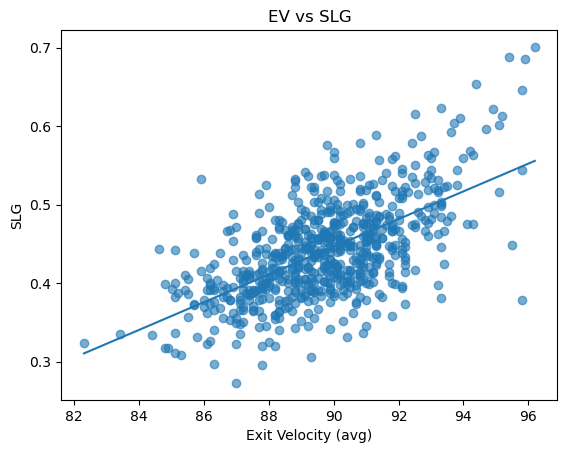

In [27]:
x = df["exit_velocity_avg"] #x axis is EV
y = df["slg_percent"] #Y axis is Slugging
m = x.notna() & y.notna() #keeps only th rows we need 
x1, y1 = x[m], y[m] #filtered data, no unknowns

m_fit, b_fit = np.polyfit(x1, y1, 1) #line of best fit

plt.figure() #for image creation
plt.scatter(x1, y1, alpha=0.6) #scatter plot 
xs = np.linspace(x1.min(), x1.max(), 200) #x points
plt.plot(xs, m_fit*xs + b_fit) #best fit line again
plt.xlabel("Exit Velocity (avg)") #x axis label
plt.ylabel("SLG") #y axis label
plt.title("EV vs SLG") #chart title
plt.show() #show the plot



EV vs OBP

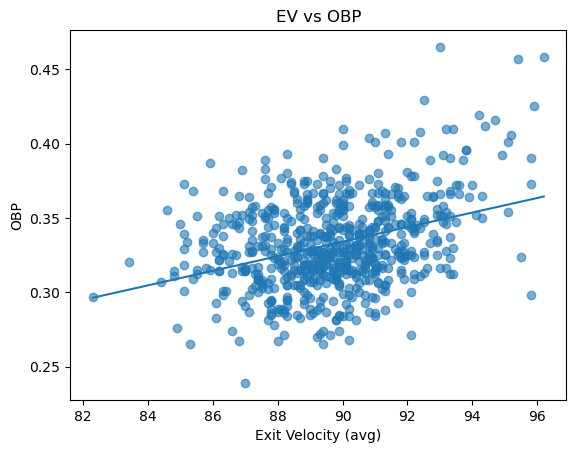

In [28]:
x = df["exit_velocity_avg"] # x axis is Exit Velocity
y = df["on_base_percent"]   # y axis is On-Base Percentage
m = x.notna() & y.notna()   # keep only valid rows
x1, y1 = x[m], y[m]         # filtered data (no missing values)

m_fit, b_fit = np.polyfit(x1, y1, 1) # line of best fit

plt.figure()                        # create new figure
plt.scatter(x1, y1, alpha=0.6)      # scatter plot
xs = np.linspace(x1.min(), x1.max(), 200) # smooth x range
plt.plot(xs, m_fit*xs + b_fit)      # plot line of best fit
plt.xlabel("Exit Velocity (avg)")   # x-axis label
plt.ylabel("OBP")                   # y-axis label
plt.title("EV vs OBP")              # chart title
plt.show()                          # show plot





EV vs RBI

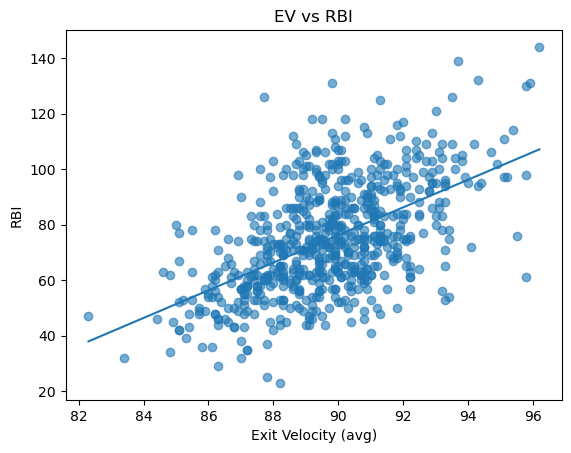

In [29]:
x = df["exit_velocity_avg"] # x axis is Exit Velocity
y = df["b_rbi"]             # y axis is Runs Batted In (RBI)
m = x.notna() & y.notna()   # filter out missing values
x1, y1 = x[m], y[m]         # clean data

m_fit, b_fit = np.polyfit(x1, y1, 1) # best fit line

plt.figure()                        # new figure
plt.scatter(x1, y1, alpha=0.6)      # scatter plot
xs = np.linspace(x1.min(), x1.max(), 200) # x values for line
plt.plot(xs, m_fit*xs + b_fit)      # line of best fit
plt.xlabel("Exit Velocity (avg)")   # label x-axis
plt.ylabel("RBI")                   # label y-axis
plt.title("EV vs RBI")              # chart title
plt.show()                          # show plot




EV vs ISO

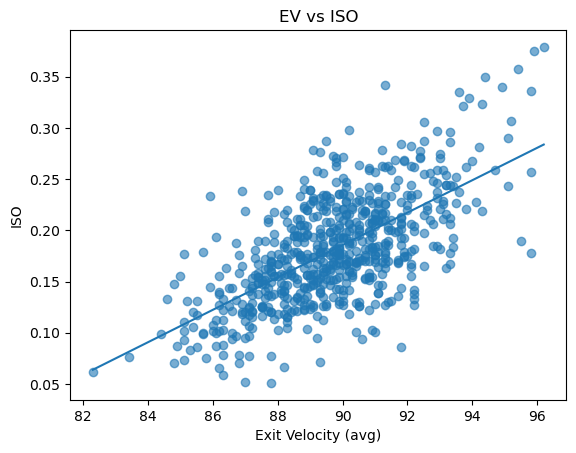

In [30]:
x = df["exit_velocity_avg"] # x axis is Exit Velocity
y = df["isolated_power"]    # y axis is Isolated Power (ISO)
m = x.notna() & y.notna()   # keep only valid rows
x1, y1 = x[m], y[m]         # filtered data

m_fit, b_fit = np.polyfit(x1, y1, 1) # line of best fit

plt.figure()                        # create new figure
plt.scatter(x1, y1, alpha=0.6)      # scatter plot points
xs = np.linspace(x1.min(), x1.max(), 200) # x values for line
plt.plot(xs, m_fit*xs + b_fit)      # best fit line
plt.xlabel("Exit Velocity (avg)")   # label for x-axis
plt.ylabel("ISO")                   # label for y-axis
plt.title("EV vs ISO")              # chart title
plt.show()                          # display the plot


EV vs OPS

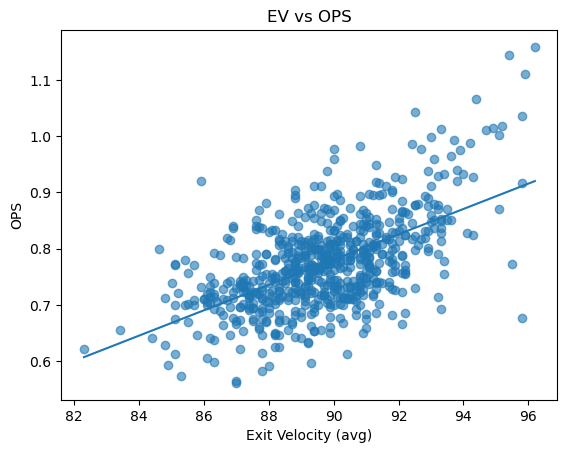

In [31]:
x = df["exit_velocity_avg"] # x axis is Exit Velocity
y = df["on_base_plus_slg"]  # y axis is On-Base Plus Slugging (OPS)
m = x.notna() & y.notna()   # filter to valid data only
x1, y1 = x[m], y[m]         # clean data

m_fit, b_fit = np.polyfit(x1, y1, 1) # line of best fit

plt.figure()                        # make a new figure
plt.scatter(x1, y1, alpha=0.6)      # scatter plot points
xs = np.linspace(x1.min(), x1.max(), 200) # x range for fit line
plt.plot(xs, m_fit*xs + b_fit)      # draw best fit line
plt.xlabel("Exit Velocity (avg)")   # x-axis label
plt.ylabel("OPS")                   # y-axis label
plt.title("EV vs OPS")              # chart title
plt.show()                          # show the plot



Next up is the matrix box for correlations

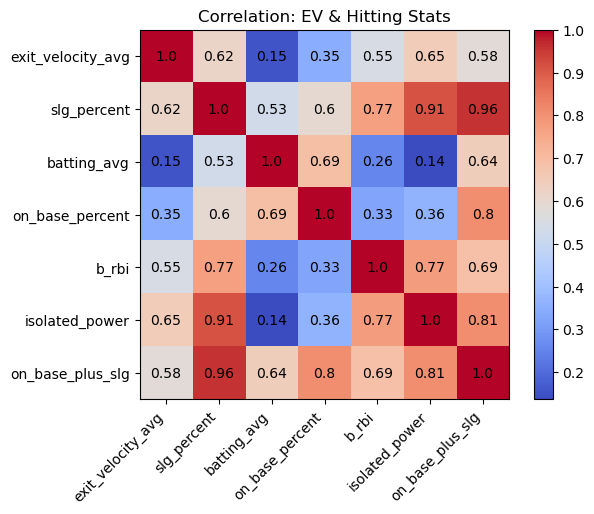

In [32]:
cols = [ #gets the ccolumns we need
    "exit_velocity_avg",
    "slg_percent",
    "batting_avg",
    "on_base_percent",
    "b_rbi",
    "isolated_power",
    "on_base_plus_slg"
]

corr = df[cols].corr() #to build correlation table

plt.imshow(corr, cmap="coolwarm") #show heatmap as cold/hot
plt.colorbar() #adds color bar
plt.xticks(range(len(cols)), cols, rotation=45, ha="right") #rotates x axis name bar
plt.yticks(range(len(cols)), cols) #rottes y axis name bar

for i in range(len(cols)): #looping through rows
    for j in range(len(cols)): #looping through columns
        plt.text(j, i, round(corr.iloc[i, j], 2), ha="center", va="center") #value of inside each box and centers text

plt.title("Correlation: EV & Hitting Stats") #chart title
plt.show() #display heatmap
